In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 2)

In [2]:
matches = pd.read_csv("C:/Users/utkar/OneDrive/Desktop/Analytics/Data/IPL Matches 2008-2020.csv")
deliveres = pd.read_csv("C:/Users/utkar/OneDrive/Desktop/Analytics/Data/IPL Ball-by-Ball 2008-2020.csv")

In [3]:
match_df = matches.copy()
del_df = deliveres.copy()

# Take data from 2016 onwards only 
match_df = match_df[match_df.id >= 980901]
del_df = del_df[del_df.id >= 980901]

### Toss Advantage

In [4]:
# Goal 
# Get Team wise Win Percentage after winning the toss
# Which teams are able to use Toss advantage

In [5]:
match_df['TossWinnerIsWinner'] = match_df.apply(lambda x: x['toss_winner'] == x['winner'], axis=1)

In [6]:
# Win Percentage after winning the toss for each team
pd.DataFrame(100 * match_df.groupby('toss_winner').TossWinnerIsWinner.sum() / match_df.groupby('toss_winner').TossWinnerIsWinner.count()).rename(columns = {'TossWinnerIsWinner' : 'WinPercentage'}).sort_values(by = 'WinPercentage', ascending = False).reset_index()

,toss_winner,WinPercentage
0,Gujarat Lions,66.67
1,Rising Pune Supergiants,61.54
2,Chennai Super Kings,61.29
3,Mumbai Indians,60.98
4,Kolkata Knight Riders,60.00
5,Sunrisers Hyderabad,59.46
6,Delhi Daredevils,50.00
7,Royal Challengers Bangalore,43.75
8,Rajasthan Royals,41.67
9,Kings XI Punjab,37.04


### Venue wise match results while batting 1st or 2nd

In [7]:
# Goal 
# venue-wise impact of batting first or second on match result

In [8]:
def getTeamBattingFirst(t1, t2, toss_winner, toss_decision): 
    if (toss_decision == 'bat'): 
        return toss_winner
    else: 
        if (toss_winner == t1): 
            return t2
        else: 
            return t1

In [9]:
def getTeamBattingSecond(t1, t2, toss_winner, toss_decision): 
    if (toss_decision == 'field'): 
        return toss_winner
    else: 
        if (toss_winner == t1): 
            return t2
        else: 
            return t1

In [10]:
match_df['TeamBattingFirst'] = match_df.apply(lambda x: getTeamBattingFirst(x['team1'] , x['team2'] , x['toss_winner'] , x['toss_decision']) , axis=1)
match_df['TeamBattingSecond'] = match_df.apply(lambda x: getTeamBattingSecond(x['team1'] , x['team2'] , x['toss_winner'] , x['toss_decision']) , axis=1)

In [11]:
match_df['TeamBattingFirstWins'] = match_df.apply( lambda x : 1 if x['TeamBattingFirst'] == x['winner'] else 0 , axis=1)

In [12]:
match_df['TeamBattingSecondWins'] = match_df.apply( lambda x : 1 if x['TeamBattingSecond'] == x['winner'] else 0 , axis=1)

In [13]:
WinPercentage = pd.DataFrame(100 * match_df.groupby('venue')['TeamBattingFirstWins'].sum() / match_df.groupby('venue')['TeamBattingFirstWins'].count()).reset_index()

In [14]:
WinPercentage.columns = ['venue', 'WinBattingFirst']
WinPercentage['WinBattingSecond'] = (100 - WinPercentage['WinBattingFirst'])

In [15]:
WinPercentage.sort_values(by = 'WinBattingFirst', ascending = False)

,venue,WinBattingFirst,WinBattingSecond
1,Dubai International Cricket Stadium,61.54,38.46
3,Feroz Shah Kotla,53.57,46.43
10,"Rajiv Gandhi International Stadium, Uppal",50.00,50.00
7,"MA Chidambaram Stadium, Chepauk",44.44,55.56
9,"Punjab Cricket Association IS Bindra Stadium, ...",42.86,57.14
6,M Chinnaswamy Stadium,41.94,58.06
14,Sharjah Cricket Stadium,41.67,58.33
15,Sheikh Zayed Stadium,40.91,59.09
2,Eden Gardens,40.00,60.00
16,Wankhede Stadium,39.29,60.71


### Average RPI for each Venue

In [16]:
# Goal 
# Get Venue Wise average first innings and second innings score

In [17]:
comb = pd.merge(del_df, match_df, how = 'left')

In [18]:
def getAverageRPI(df, current_innings): 
    df = df[df.inning == current_innings]
    df.reset_index(inplace = True, drop = True)
    
    if (current_innings == 1): 
        col_name = '1st_Innings_Average'
    else:
        col_name = '2nd_Innings_Average'
        
    df_RunsPerMatch = pd.DataFrame(df.groupby(['id' , 'venue']).total_runs.sum()).rename(columns = {'total_runs' : col_name}).reset_index()
    
    df_venueAverage = df_RunsPerMatch.groupby('venue')[col_name].mean().reset_index()
    
    return df_venueAverage 

In [19]:
df_1stinnings = getAverageRPI(comb,1)
df_2ndinnings = getAverageRPI(comb,2)

In [20]:
pd.merge(df_1stinnings, df_2ndinnings, on = 'venue').sort_values(by = '1st_Innings_Average' , ascending = False)

,venue,1st_Innings_Average,2nd_Innings_Average
14,Sharjah Cricket Stadium,177.92,163.33
6,M Chinnaswamy Stadium,172.48,156.87
2,Eden Gardens,171.57,155.20
1,Dubai International Cricket Stadium,171.54,149.15
3,Feroz Shah Kotla,170.18,154.39
16,Wankhede Stadium,169.68,163.46
9,"Punjab Cricket Association IS Bindra Stadium, ...",169.57,164.76
8,Maharashtra Cricket Association Stadium,169.41,156.76
11,Saurashtra Cricket Association Stadium,168.90,162.70
5,Holkar Cricket Stadium,166.86,164.29


### Bowler / Batsmen Friendly Venues

In [21]:
# Goal 
# Most Bowler or Batsmen friendly venues ? 
# Venues with least/most run per wicket per match

In [22]:
avg_run_per_match = pd.DataFrame(comb.groupby(['venue']).total_runs.sum() / comb.groupby('venue').id.nunique()).reset_index()
avg_run_per_match.columns = ['venue', 'AvgRuns']

In [23]:
avg_wkt_per_match = pd.DataFrame(comb.groupby(['venue']).is_wicket.sum() / comb.groupby('venue').id.nunique()).reset_index()
avg_wkt_per_match.columns = ['venue', 'AvgWkts']

In [24]:
final_df = pd.merge(avg_run_per_match , avg_wkt_per_match, on = 'venue')

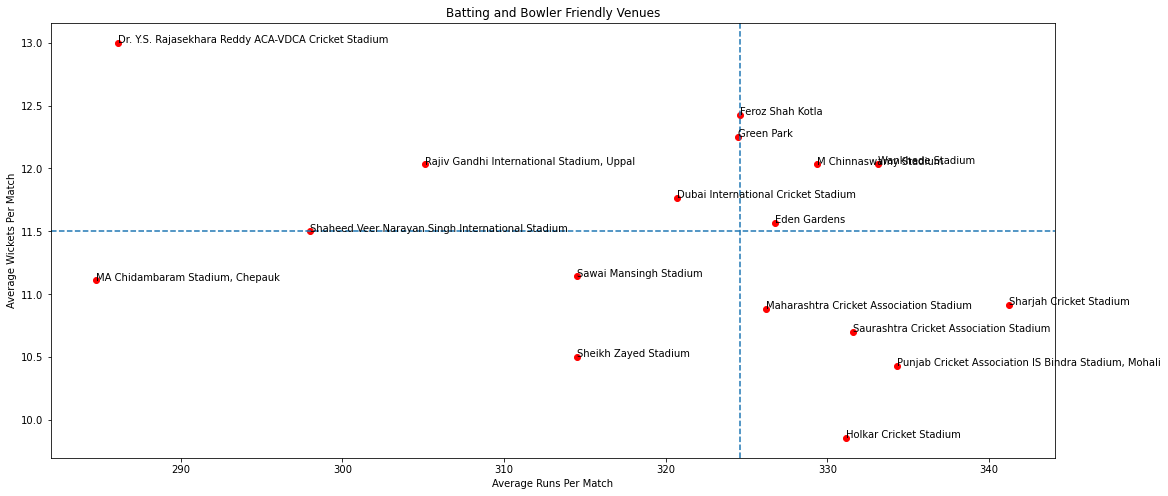

In [25]:
plt.figure(figsize = (18,8))
plt.scatter(final_df.AvgRuns, final_df.AvgWkts, color = 'red')

for i in range(len(final_df)): 
        plt.text(final_df['AvgRuns'][i], final_df['AvgWkts'][i], final_df['venue'][i])
  
plt.axvline(final_df['AvgRuns'].median() , ls ='--')
plt.axhline(final_df['AvgWkts'].median() , ls ='--')
plt.title('Batting and Bowler Friendly Venues')
plt.ylabel('Average Wickets Per Match')
plt.xlabel('Average Runs Per Match')
plt.show()

In [26]:
final_df

,venue,AvgRuns,AvgWkts
0,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,286.12,13.00
1,Dubai International Cricket Stadium,320.69,11.77
2,Eden Gardens,326.77,11.57
3,Feroz Shah Kotla,324.57,12.43
4,Green Park,324.50,12.25
5,Holkar Cricket Stadium,331.14,9.86
6,M Chinnaswamy Stadium,329.35,12.03
7,"MA Chidambaram Stadium, Chepauk",284.78,11.11
8,Maharashtra Cricket Association Stadium,326.18,10.88
9,"Punjab Cricket Association IS Bindra Stadium, ...",334.33,10.43


In [27]:
# Best Venues for Spinners / Fast Bowlers ?? 